<a href="https://colab.research.google.com/github/duraichellam001-tech/epa-co2-architecture/blob/master/notebooks%5C04_Physics%2BML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/duraichellam001-tech/epa-co2-architecture.git


Cloning into 'epa-co2-architecture'...
remote: Enumerating objects: 120, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 120 (delta 48), reused 78 (delta 21), pack-reused 0 (from 0)
Receiving objects: 100% (120/120), 2.77 MiB | 6.96 MiB/s, done.
Resolving deltas: 100% (48/48), done.


In [2]:
%cd /content/epa-co2-architecture
!git pull


/content/epa-co2-architecture
Already up to date.


In [3]:
import os
os.chdir("/content/epa-co2-architecture")


In [4]:
!ls physics/cycles
!ls artifacts


EPA_CITY.csv  EPA_HWY.csv
epa_co2_architecture_pathA_v1_metadata.json
epa_co2_architecture_pathA_v1.parquet
epa_co2_architecture_pathB_residuals_v1.parquet
epa_co2_architecture_pathB_v1_metadata.json
epa_co2_architecture_pathB_v1.parquet


In [5]:
from physics.physics_co2 import compute_city_hwy_co2_g_per_mi


In [6]:
res = compute_city_hwy_co2_g_per_mi(
    mass_lb=4000,
    trans_type="AT",
    drive_layout="FWD"
)
res


{'city': np.float64(296.5653631802091), 'hwy': np.float64(327.1656696279422)}

In [7]:
import pandas as pd

df = pd.read_parquet(
    "artifacts/epa_co2_architecture_pathB_v1.parquet"
)


In [8]:
df.head()


,Model Year,Test Veh Displacement (L),Equivalent Test Weight (lbs.),transmission_bucket,drive_bucket,CO2_combined,CO2_city_gpm,CO2_hwy_gpm
0,2010,0.999,2125,AT,RWD,180.078500,201.260000,154.190000
1,2010,1.300,3000,CVT,FWD,154.106628,162.374183,144.001838
2,2010,1.300,3125,CVT,FWD,151.140680,162.953045,136.703344
3,2010,1.300,3375,AT,RWD,344.400000,411.000000,263.000000
4,2010,1.300,3375,MT,RWD,355.900000,421.000000,276.333333


In [9]:
physics_city = []
physics_hwy = []

for _, row in df.iterrows():
    res = compute_city_hwy_co2_g_per_mi(
        mass_lb=row["Equivalent Test Weight (lbs.)"],
        trans_type=row["transmission_bucket"],
        drive_layout=row["drive_bucket"],
    )
    physics_city.append(res["city"])
    physics_hwy.append(res["hwy"])

df["CO2_physics_city"] = physics_city
df["CO2_physics_hwy"] = physics_hwy


In [10]:
df["Residual_city"] = df["CO2_city_gpm"] - df["CO2_physics_city"]
df["Residual_hwy"]  = df["CO2_hwy_gpm"]  - df["CO2_physics_hwy"]


In [11]:
df[["Residual_city", "Residual_hwy"]].describe()


,Residual_city,Residual_hwy
count,9483.000000,9483.000000
mean,62.035665,-100.143200
std,90.582854,45.619630
min,-184.081294,-232.370879
25%,10.250054,-127.985934
50%,51.048332,-104.733368
75%,104.143283,-75.682923
max,616.757783,204.063970


In [12]:
df.to_parquet(
    "artifacts/epa_co2_architecture_pathB_residuals_v1.parquet",
    index=False
)


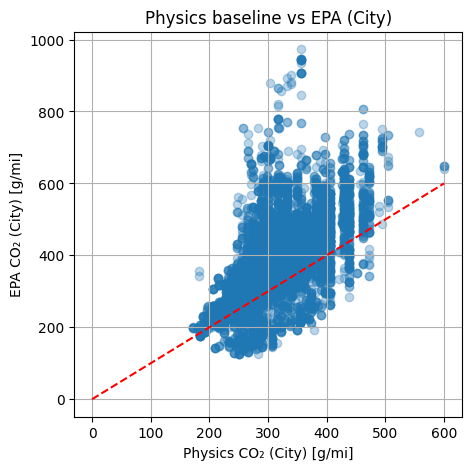

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(
    df["CO2_physics_city"],
    df["CO2_city_gpm"],
    alpha=0.3
)
plt.plot([0,600],[0,600], 'r--')
plt.xlabel("Physics CO₂ (City) [g/mi]")
plt.ylabel("EPA CO₂ (City) [g/mi]")
plt.title("Physics baseline vs EPA (City)")
plt.grid(True)
plt.show()



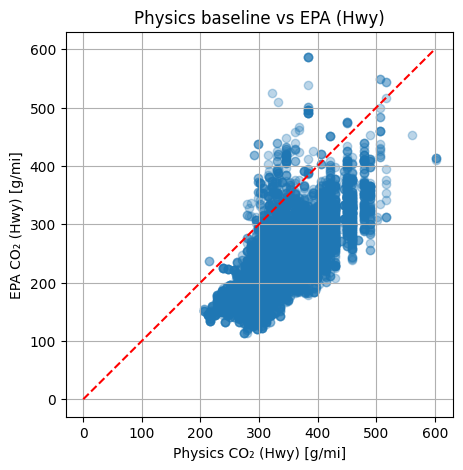

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(
    df["CO2_physics_hwy"],
    df["CO2_hwy_gpm"],
    alpha=0.3
)
plt.plot([0,600],[0,600], 'r--')
plt.xlabel("Physics CO₂ (Hwy) [g/mi]")
plt.ylabel("EPA CO₂ (Hwy) [g/mi]")
plt.title("Physics baseline vs EPA (Hwy)")
plt.grid(True)
plt.show()

In [15]:
df.head()

,Model Year,Test Veh Displacement (L),Equivalent Test Weight (lbs.),transmission_bucket,drive_bucket,CO2_combined,CO2_city_gpm,CO2_hwy_gpm,CO2_physics_city,CO2_physics_hwy,Residual_city,Residual_hwy
0,2010,0.999,2125,AT,RWD,180.078500,201.260000,154.190000,172.480030,206.128366,28.779970,-51.938366
1,2010,1.300,3000,CVT,FWD,154.106628,162.374183,144.001838,225.411549,258.009001,-63.037366,-114.007163
2,2010,1.300,3125,CVT,FWD,151.140680,162.953045,136.703344,233.601461,266.005567,-70.648416,-129.302223
3,2010,1.300,3375,AT,RWD,344.400000,411.000000,263.000000,257.970799,290.884528,153.029201,-27.884528
4,2010,1.300,3375,MT,RWD,355.900000,421.000000,276.333333,247.222015,278.764339,173.777985,-2.431006


In [16]:
df.describe()

,Model Year,Test Veh Displacement (L),Equivalent Test Weight (lbs.),CO2_combined,CO2_city_gpm,CO2_hwy_gpm,CO2_physics_city,CO2_physics_hwy,Residual_city,Residual_hwy
count,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,2017.239165,3.149949,4278.656649,317.287747,377.280994,243.962667,315.245329,344.105867,62.035665,-100.143200
std,4.462617,1.363003,849.557271,89.359627,114.548348,61.125106,59.186352,55.732999,90.582854,45.619630
min,2010.000000,0.600000,2125.000000,122.173867,126.276696,113.411600,172.480030,206.128366,-184.081294,-232.370879
25%,2013.000000,2.000000,3625.000000,254.395886,298.213119,200.011341,271.901352,303.786247,10.250054,-127.985934
50%,2017.000000,2.996000,4250.000000,309.030375,366.072461,236.967450,305.930585,337.497217,51.048332,-104.733368
75%,2021.000000,3.800000,4750.000000,368.024675,442.815000,278.240550,348.897017,376.436102,104.143283,-75.682923
max,2025.000000,8.400000,8500.000000,785.000000,973.000000,587.000000,600.283360,601.198648,616.757783,204.063970


In [17]:
# -----------------------------
# Feature definitions
# -----------------------------

num_features = [
    "Model Year",
    "Test Veh Displacement (L)",
    "Equivalent Test Weight (lbs.)",
    "CO2_physics_city",
]

cat_features = [
    "transmission_bucket",
    "drive_bucket",
]

target_col = "Residual_city"

print("Numerical features:", num_features)
print("Categorical features:", cat_features)
print("Target:", target_col)


Numerical features: ['Model Year', 'Test Veh Displacement (L)', 'Equivalent Test Weight (lbs.)', 'CO2_physics_city']
Categorical features: ['transmission_bucket', 'drive_bucket']
Target: Residual_city


In [18]:
# -----------------------------
# Train / Test split (year-based)
# -----------------------------

TRAIN_END_YEAR = 2018

train_df = df[df["Model Year"] <= TRAIN_END_YEAR].copy()
test_df  = df[df["Model Year"] > TRAIN_END_YEAR].copy()

print("Train shape:", train_df.shape)
print("Test shape :", test_df.shape)


Train shape: (5601, 12)
Test shape : (3882, 12)


In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor


In [20]:
# -----------------------------
# Preprocessing
# -----------------------------

preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
    ]
)

# -----------------------------
# Model
# -----------------------------

gbr = GradientBoostingRegressor(
    n_estimators=300,
    max_depth=3,
    learning_rate=0.05,
    random_state=42
)

pipe_city = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", gbr),
    ]
)


In [21]:
X_train = train_df[num_features + cat_features]
y_train = train_df[target_col]

X_test  = test_df[num_features + cat_features]
y_test  = test_df[target_col]

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)


X_train: (5601, 6)
y_train: (5601,)


In [22]:
pipe_city.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Model Year',
                                                   'Test Veh Displacement (L)',
                                                   'Equivalent Test Weight '
                                                   '(lbs.)',
                                                   'CO2_physics_city']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['transmission_bucket',
                                                   'drive_bucket'])])),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.05, n_estimators=300,
                                           random_state=42))])

In [23]:
from sklearn.metrics import r2_score, mean_absolute_error

residual_pred = pipe_city.predict(X_test)

r2 = r2_score(y_test, residual_pred)
mae = mean_absolute_error(y_test, residual_pred)

print(f"City Residual ML — R2  : {r2:.3f}")
print(f"City Residual ML — MAE : {mae:.2f} g/mi")


City Residual ML — R2  : 0.726
City Residual ML — MAE : 35.84 g/mi


In [24]:
co2_city_pred = (
    test_df["CO2_physics_city"].values + residual_pred
)


In [25]:
from sklearn.metrics import r2_score

r2_physics = r2_score(
    test_df["CO2_city_gpm"],
    test_df["CO2_physics_city"]
)

r2_final = r2_score(
    test_df["CO2_city_gpm"],
    co2_city_pred
)

print(f"Physics-only R2 : {r2_physics:.3f}")
print(f"Physics + ML R2 : {r2_final:.3f}")


Physics-only R2 : 0.227
Physics + ML R2 : 0.819


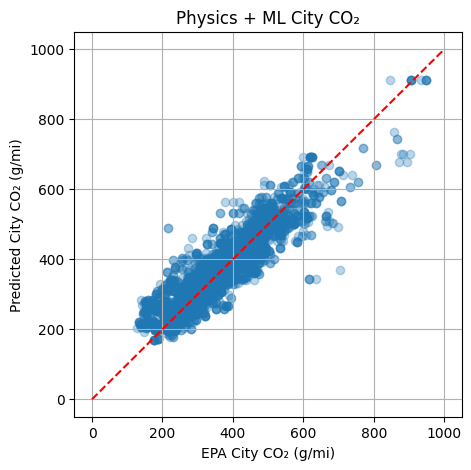

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(
    test_df["CO2_city_gpm"],
    co2_city_pred,
    alpha=0.3
)
plt.plot([0,1000],[0,1000],'r--')
plt.xlabel("EPA City CO₂ (g/mi)")
plt.ylabel("Predicted City CO₂ (g/mi)")
plt.title("Physics + ML City CO₂")
plt.grid(True)
plt.show()


In [27]:
from sklearn.metrics import r2_score, mean_absolute_error

r2_final_city = r2_score(
    test_df["CO2_city_gpm"],
    co2_city_pred
)

mae_final_city = mean_absolute_error(
    test_df["CO2_city_gpm"],
    co2_city_pred
)

print(f"Final City CO2 — R2  : {r2_final_city:.3f}")
print(f"Final City CO2 — MAE : {mae_final_city:.2f} g/mi")


Final City CO2 — R2  : 0.819
Final City CO2 — MAE : 35.84 g/mi


In [28]:
import joblib
import os

os.makedirs("models/pathB", exist_ok=True)


In [29]:
joblib.dump(
    pipe_city,
    "models/pathB/city_residual_gbr_v1.joblib"
)


['models/pathB/city_residual_gbr_v1.joblib']

In [30]:
pipe_city_loaded = joblib.load(
    "models/pathB/city_residual_gbr_v1.joblib"
)

# quick sanity prediction
_ = pipe_city_loaded.predict(X_test[:5])


In [31]:
# -----------------------------
# Feature definitions (Highway)
# -----------------------------

num_features_hwy = [
    "Model Year",
    "Test Veh Displacement (L)",
    "Equivalent Test Weight (lbs.)",
    "CO2_physics_hwy",
]

cat_features = [
    "transmission_bucket",
    "drive_bucket",
]

target_col_hwy = "Residual_hwy"

print("Numerical features:", num_features_hwy)
print("Categorical features:", cat_features)
print("Target:", target_col_hwy)


Numerical features: ['Model Year', 'Test Veh Displacement (L)', 'Equivalent Test Weight (lbs.)', 'CO2_physics_hwy']
Categorical features: ['transmission_bucket', 'drive_bucket']
Target: Residual_hwy


In [32]:
preprocess_hwy = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_features_hwy),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
    ]
)

gbr_hwy = GradientBoostingRegressor(
    n_estimators=300,
    max_depth=3,
    learning_rate=0.05,
    random_state=42
)

pipe_hwy = Pipeline(
    steps=[
        ("preprocess", preprocess_hwy),
        ("model", gbr_hwy),
    ]
)


In [33]:
# -----------------------------
# Train / Test split (year-based)
# -----------------------------

TRAIN_END_YEAR = 2018

train_df = df[df["Model Year"] <= TRAIN_END_YEAR].copy()
test_df  = df[df["Model Year"] > TRAIN_END_YEAR].copy()

print("Train shape:", train_df.shape)
print("Test shape :", test_df.shape)


Train shape: (5601, 12)
Test shape : (3882, 12)


In [34]:
X_train_hwy = train_df[num_features_hwy + cat_features]
y_train_hwy = train_df[target_col_hwy]

X_test_hwy  = test_df[num_features_hwy + cat_features]
y_test_hwy  = test_df[target_col_hwy]

print("X_train_hwy:", X_train_hwy.shape)
print("y_train_hwy:", y_train_hwy.shape)


X_train_hwy: (5601, 6)
y_train_hwy: (5601,)


In [35]:
pipe_hwy.fit(X_train_hwy, y_train_hwy)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Model Year',
                                                   'Test Veh Displacement (L)',
                                                   'Equivalent Test Weight '
                                                   '(lbs.)',
                                                   'CO2_physics_hwy']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['transmission_bucket',
                                                   'drive_bucket'])])),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.05, n_estimators=300,
                                           random_state=42))])

In [36]:
from sklearn.metrics import r2_score, mean_absolute_error

residual_pred_hwy = pipe_hwy.predict(X_test_hwy)

r2_hwy = r2_score(y_test_hwy, residual_pred_hwy)
mae_hwy = mean_absolute_error(y_test_hwy, residual_pred_hwy)

print(f"Highway Residual ML — R2  : {r2_hwy:.3f}")
print(f"Highway Residual ML — MAE : {mae_hwy:.2f} g/mi")


Highway Residual ML — R2  : 0.646
Highway Residual ML — MAE : 21.10 g/mi


In [37]:
co2_hwy_pred = (
    test_df["CO2_physics_hwy"].values + residual_pred_hwy
)


In [38]:
r2_physics_hwy = r2_score(
    test_df["CO2_hwy_gpm"],
    test_df["CO2_physics_hwy"]
)

r2_final_hwy = r2_score(
    test_df["CO2_hwy_gpm"],
    co2_hwy_pred
)

print(f"Physics-only Hwy R2 : {r2_physics_hwy:.3f}")
print(f"Physics + ML Hwy R2 : {r2_final_hwy:.3f}")


Physics-only Hwy R2 : -2.931
Physics + ML Hwy R2 : 0.794


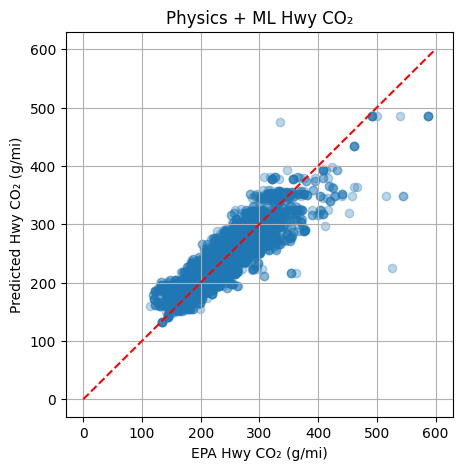

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(
    test_df["CO2_hwy_gpm"],
    co2_hwy_pred,
    alpha=0.3
)
plt.plot([0,600],[0,600],'r--')
plt.xlabel("EPA Hwy CO₂ (g/mi)")
plt.ylabel("Predicted Hwy CO₂ (g/mi)")
plt.title("Physics + ML Hwy CO₂")
plt.grid(True)
plt.show()


In [40]:
co2_combined_pred = (
    0.55 * co2_city_pred +
    0.45 * co2_hwy_pred
)


In [41]:
co2_combined_true = (
    0.55 * test_df["CO2_city_gpm"].values +
    0.45 * test_df["CO2_hwy_gpm"].values
)


In [42]:
from sklearn.metrics import r2_score, mean_absolute_error

r2_combined = r2_score(co2_combined_true, co2_combined_pred)
mae_combined = mean_absolute_error(co2_combined_true, co2_combined_pred)

print(f"Final Combined CO2 — R2  : {r2_combined:.3f}")
print(f"Final Combined CO2 — MAE : {mae_combined:.2f} g/mi")


Final Combined CO2 — R2  : 0.825
Final Combined CO2 — MAE : 27.99 g/mi


In [43]:
joblib.dump(
    pipe_city,
    "models/pathB/hwy_residual_gbr_v1.joblib"
)


['models/pathB/hwy_residual_gbr_v1.joblib']

In [53]:
co2_combined_true = (
    0.55 * test_df["CO2_city_gpm"].values +
    0.45 * test_df["CO2_hwy_gpm"].values
)

co2_physics_combined = (
    0.55 * test_df["CO2_physics_city"].values +
    0.45 * test_df["CO2_physics_hwy"].values
)


co2_physics_combined = (
    0.55 * test_df["CO2_physics_city"].values +
    0.45 * test_df["CO2_physics_hwy"].values
)


ml_only_model = joblib.load(
    "models/pathA/co2_combined_gbr_v1.joblib"
)

X_ml_only = test_df[
    [
        "Model Year",
        "Test Veh Displacement (L)",
        "Equivalent Test Weight (lbs.)",
        "transmission_bucket",
        "drive_bucket",
    ]
]

co2_ml_only = ml_only_model.predict(X_ml_only)



/usr/local/lib/python3.12/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator OneHotEncoder from version 1.8.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator FunctionTransformer from version 1.8.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator ColumnTransformer from version 1.8.0 when using version 1.6.1. This might lead to breaking c

In [54]:
# City
co2_city_pred = (
    test_df["CO2_physics_city"].values + residual_pred
)

# Highway
co2_hwy_pred = (
    test_df["CO2_physics_hwy"].values + residual_pred_hwy
)

# Combined
co2_phys_ml_combined = (
    0.55 * co2_city_pred +
    0.45 * co2_hwy_pred
)


In [56]:
from sklearn.metrics import r2_score, mean_absolute_error
import pandas as pd

def metrics(y_true, y_pred):
    return {
        "R2": r2_score(y_true, y_pred),
        "MAE (g/mi)": mean_absolute_error(y_true, y_pred)
    }

results = {
    "Physics only": metrics(
        co2_combined_true,
        co2_physics_combined
    ),
    "ML only": metrics(
        co2_combined_true,
        co2_ml_only
    ),
    "Physics + ML": metrics(
        co2_combined_true,
        co2_phys_ml_combined
    ),
}

metrics_df = pd.DataFrame(results).T
metrics_df


,R2,MAE (g/mi)
Physics only,0.277245,60.613900
ML only,0.827342,28.291981
Physics + ML,0.825442,27.991915


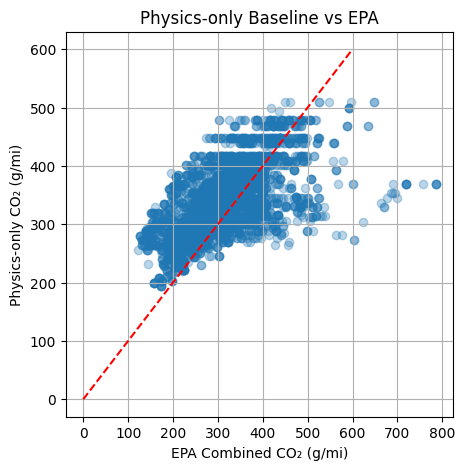

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(
    co2_combined_true,
    co2_physics_combined,
    alpha=0.3
)
plt.plot([0,600],[0,600],'r--')
plt.xlabel("EPA Combined CO₂ (g/mi)")
plt.ylabel("Physics-only CO₂ (g/mi)")
plt.title("Physics-only Baseline vs EPA")
plt.grid(True)
plt.show()


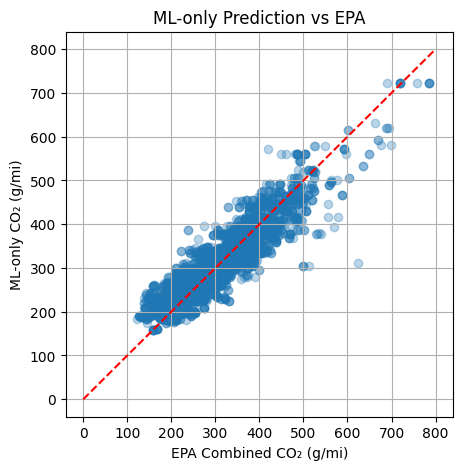

In [61]:
plt.figure(figsize=(5,5))
plt.scatter(
    co2_combined_true,
    co2_ml_only,
    alpha=0.3
)
plt.plot([0,800],[0,800],'r--')
plt.xlabel("EPA Combined CO₂ (g/mi)")
plt.ylabel("ML-only CO₂ (g/mi)")
plt.title("ML-only Prediction vs EPA")
plt.grid(True)
plt.show()


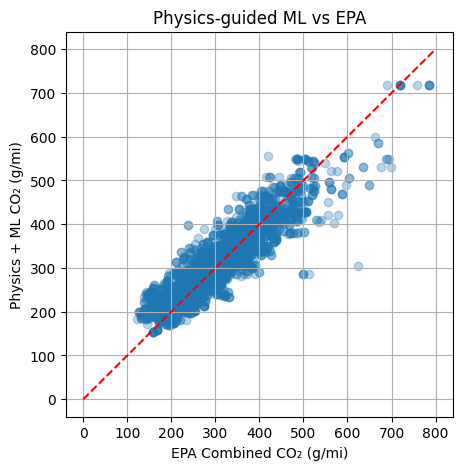

In [64]:
plt.figure(figsize=(5,5))
plt.scatter(
    co2_combined_true,
    co2_phys_ml_combined,
    alpha=0.3
)
plt.plot([0,800],[0,800],'r--')
plt.xlabel("EPA Combined CO₂ (g/mi)")
plt.ylabel("Physics + ML CO₂ (g/mi)")
plt.title("Physics-guided ML vs EPA")
plt.grid(True)
plt.show()


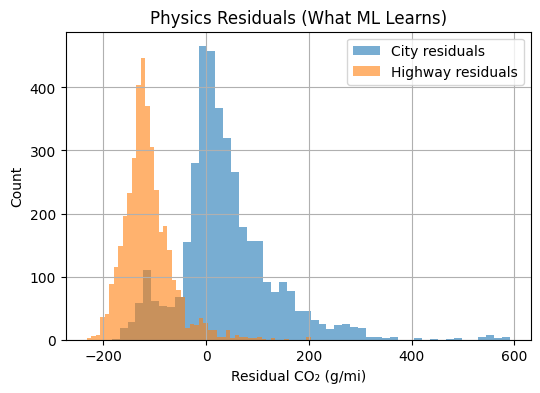

In [65]:
plt.figure(figsize=(6,4))
plt.hist(
    test_df["Residual_city"],
    bins=50,
    alpha=0.6,
    label="City residuals"
)
plt.hist(
    test_df["Residual_hwy"],
    bins=50,
    alpha=0.6,
    label="Highway residuals"
)
plt.xlabel("Residual CO₂ (g/mi)")
plt.ylabel("Count")
plt.title("Physics Residuals (What ML Learns)")
plt.legend()
plt.grid(True)
plt.show()


In [66]:
import numpy as np

masses = np.arange(3000, 7001, 250)

phys_vals = []
ml_vals = []
phys_ml_vals = []

for m in masses:
    # physics
    res = compute_city_hwy_co2_g_per_mi(
        mass_lb=m,
        trans_type="AT",
        drive_layout="FWD"
    )
    phys_comb = 0.55 * res["city"] + 0.45 * res["hwy"]
    phys_vals.append(phys_comb)

    # ML-only
    X_ml = pd.DataFrame([{
        "Model Year": 2025,
        "Test Veh Displacement (L)": 2.0,
        "Equivalent Test Weight (lbs.)": m,
        "transmission_bucket": "AT",
        "drive_bucket": "FWD",
    }])
    ml_vals.append(ml_only_model.predict(X_ml)[0])

    # Physics + ML
    X_city = pd.DataFrame([{
        "Model Year": 2025,
        "Test Veh Displacement (L)": 2.0,
        "Equivalent Test Weight (lbs.)": m,
        "CO2_physics_city": res["city"],
        "transmission_bucket": "AT",
        "drive_bucket": "FWD",
    }])
    X_hwy = pd.DataFrame([{
        "Model Year": 2025,
        "Test Veh Displacement (L)": 2.0,
        "Equivalent Test Weight (lbs.)": m,
        "CO2_physics_hwy": res["hwy"],
        "transmission_bucket": "AT",
        "drive_bucket": "FWD",
    }])

    final_city = res["city"] + city_model.predict(X_city)[0]
    final_hwy  = res["hwy"]  + hwy_model.predict(X_hwy)[0]
    phys_ml_vals.append(0.55*final_city + 0.45*final_hwy)

plt.figure(figsize=(7,4))
plt.plot(masses, phys_vals, "k--", label="Physics only")
plt.plot(masses, ml_vals, "o--", label="ML-only")
plt.plot(masses, phys_ml_vals, "o-", label="Physics + ML")
plt.xlabel("Vehicle Mass (lb)")
plt.ylabel("Combined CO₂ (g/mi)")
plt.title("Mass Extrapolation Behaviour")
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'city_model' is not defined